In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/ubos_yield.xlsx")
df.head()

,years,region,area planted,area harvested,production,yield(MT/ha),yield(MT/ha).1,rainfall,TEMPERATURE
0,2019-01-01,South Buganda,89328,85168.0,127887,1.5,1.4,137.110000,23.223333
1,2019-01-01,North Buganda,198285,175282.0,283621,1.6,1.4,137.110000,23.223333
2,2019-01-01,West Nile,43766,37465.0,45271,1.2,1.0,121.290000,28.046667
3,2019-01-01,Lango,79683,75210.0,92444,1.2,1.2,61.523333,27.100000
4,2019-01-01,Acholi,76779,64740.0,58407,0.9,0.8,68.556667,27.776667


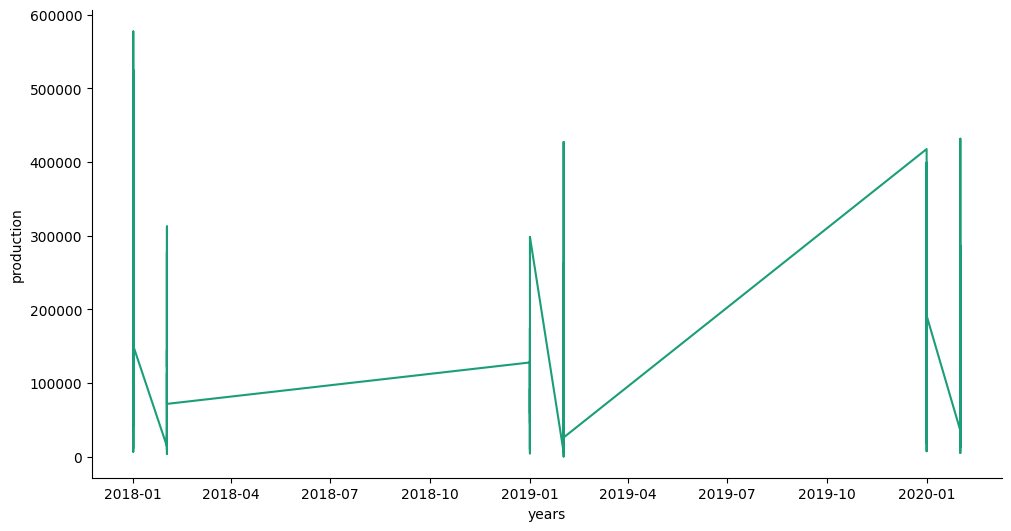

In [ ]:
# @title years vs production

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['years']
  ys = series['production']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('years', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('years')
_ = plt.ylabel('production')

In [ ]:
df.shape


(84, 9)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   years           84 non-null     datetime64[ns]
 1   region          84 non-null     object        
 2   area planted    84 non-null     int64         
 3   area harvested  70 non-null     float64       
 4   production      84 non-null     int64         
 5   yield(MT/ha)    84 non-null     float64       
 6   yield(MT/ha).1  56 non-null     float64       
 7   rainfall        84 non-null     float64       
 8   TEMPERATURE     84 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()


,0
years,0
region,0
area planted,0
area harvested,14
production,0
yield(MT/ha),0
yield(MT/ha).1,28
rainfall,0
TEMPERATURE,0


In [ ]:
# Remove the specified columns
columns_to_remove = ["area harvested", "area harvested", "yield(MT/ha).1", "production", "region"]
df2 = df.drop(columns=columns_to_remove)
df2.head()


,years,area planted,yield(MT/ha),rainfall,TEMPERATURE
0,2019-01-01,89328,1.5,137.110000,23.223333
1,2019-01-01,198285,1.6,137.110000,23.223333
2,2019-01-01,43766,1.2,121.290000,28.046667
3,2019-01-01,79683,1.2,61.523333,27.100000
4,2019-01-01,76779,0.9,68.556667,27.776667


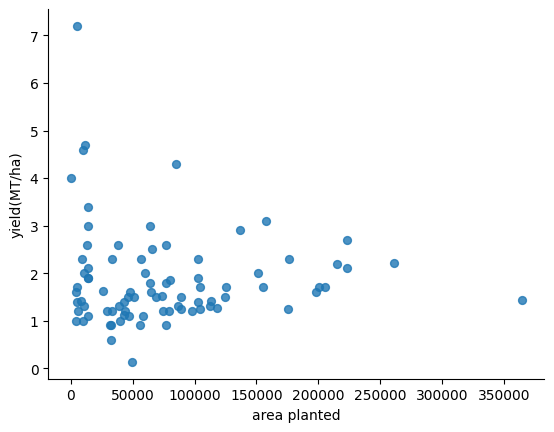

In [ ]:
# @title area planted vs yield(MT/ha)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='area planted', y='yield(MT/ha)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df2['years'] = pd.to_datetime(df2['years'])

# Sort the dataframe by date
df3 = df2.sort_values('years')

df3.head()

,years,area planted,yield(MT/ha),rainfall,TEMPERATURE
69,2018-01-01,8648,1.419866,177.540000,18.753333
57,2018-01-01,364012,1.442472,184.573333,21.400000
58,2018-01-01,175729,1.245218,217.966667,21.793333
59,2018-01-01,74121,1.517991,302.343333,22.330000
60,2018-01-01,89409,1.248498,260.156667,17.646667


In [ ]:
df3.shape

(84, 5)

In [ ]:
df3

,years,area planted,yield(MT/ha),rainfall,TEMPERATURE
69,2018-01-01,8648,1.419866,177.540000,18.753333
57,2018-01-01,364012,1.442472,184.573333,21.400000
58,2018-01-01,175729,1.245218,217.966667,21.793333
59,2018-01-01,74121,1.517991,302.343333,22.330000
60,2018-01-01,89409,1.248498,260.156667,17.646667
...,...,...,...,...,...
52,2020-02-01,38307,2.600000,242.577500,22.712500
53,2020-02-01,13875,3.400000,221.482500,17.322500
54,2020-02-01,5237,7.200000,184.572500,22.030000
43,2020-02-01,223404,2.700000,155.567500,21.805000


In [ ]:
X = df3.drop(['yield(MT/ha)', 'years'], axis=1)
y = df3['yield(MT/ha)']
dates = df3['years']


In [ ]:
 #Separate numeric and non-numeric columns
#numeric_cols = df3.select_dtypes(include=['number']).columns
#non_numeric_cols = df3.select_dtypes(exclude=['number']).columns

In [ ]:
#non_numeric_cols

In [ ]:
#print(X.dtypes)

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Display the shape of the scaled features
print("Shape of scaled features:", X_scaled.shape)

# Display the first few rows of the scaled data
print(pd.DataFrame(X_scaled).head())


Shape of scaled features: (84, 3)
          0         1         2
0  0.023623  0.081302  0.133421
1  1.000000  0.085368  0.380216
2  0.482685  0.104674  0.416893
3  0.203513  0.153456  0.466936
4  0.245517  0.129066  0.030228


In [ ]:
# Define the split ratio (e.g., 80% for training, 20% for testing)
split_ratio = 0.8
train_size = int(len(X_scaled) * split_ratio)

# Split the data in a sequential manner
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training data shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing data shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training data shape: X_train: (67, 3), y_train: (67,)
Testing data shape: X_test: (17, 3), y_test: (17,)


In [ ]:
# Create sequences for LSTM
sequence_length = 5  # Adjust this based on your needs
X_sequences = []
y_sequences = []
dates_sequences = []

for i in range(len(X_train) - sequence_length):
    X_sequences.append(X_train[i:i+sequence_length])
    y_sequences.append(y.iloc[i+sequence_length])
    dates_sequences.append(dates.iloc[i+sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)


In [ ]:
print('trainX shape == {}.'.format(X_sequences.shape))
print('trainY shape == {}.'.format(y_sequences.shape))

trainX shape == (62, 5, 3).
trainY shape == (62,).


In [ ]:
#val_split_ratio = 0.1
#val_size = int(len(X_train) * val_split_ratio)

#X_val, X_train = X_train[-val_size:], X_train[:-val_size]
#y_val, y_train = y_train[-val_size:], y_train[:-val_size]

#print(f"Validation data shape: X_val: {X_val.shape}, y_val: {y_val.shape}")

In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_sequences.shape[1], X_sequences.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 5, 64)               │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_sequences, y_sequences, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 890ms/step - loss: 2.1385 - val_loss: 2.7373
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.8316 - val_loss: 2.2211
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.5466 - val_loss: 1.7520
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.2834 - val_loss: 1.3503
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8453 - val_loss: 1.0197
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8901 - val_loss: 0.7550
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5167 - val_loss: 0.5565
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5342 - val_loss: 0.4214
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4086 - val_loss: 0.3441
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4863 - val_loss: 0.3076
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5022 - val_loss: 0.2961
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4116 - val_l

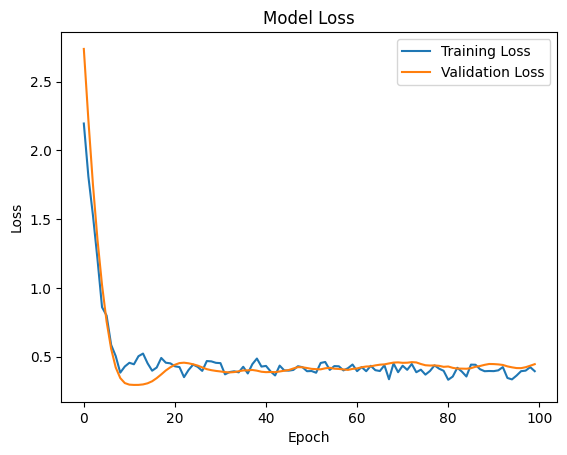

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Similarly, create sequences for testing data
X_test_sequences = []
y_test_sequences = []

for i in range(len(X_test) - sequence_length):
    X_test_sequences.append(X_test[i:i + sequence_length])
    y_test_sequences.append(y_test.iloc[i + sequence_length])

X_test_sequences = np.array(X_test_sequences)
y_test_sequences = np.array(y_test_sequences)

print(f"X_test_sequences shape: {X_test_sequences.shape}, y_test_sequences shape: {y_test_sequences.shape}")


X_test_sequences shape: (12, 5, 3), y_test_sequences shape: (12,)


In [ ]:
# Evaluate the model (Ensure model expects 3D input)
loss = model.evaluate(X_test_sequences, y_test_sequences, verbose=0)
print(f'Test loss: {loss}')

Test loss: 5.24578332901001


In [ ]:
# Make predictions
predictions = model.predict(X_test_sequences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_sequences, predictions)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (R²) score
r2 = r2_score(y_test_sequences, predictions)
print(f'R-squared (R²) Score: {r2}')

Mean Squared Error: 5.245783669397146
R-squared (R²) Score: -1.3050649915876509
